In [2]:
#Run this notebook in the root directory of the project
%cd ../../../

/data/main/2024/GridCellsCond


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sim_utils as s_utils
import analysis_utils as a_utils

# 1D Activity Pattern

In [4]:
sim_id = 'VALD-ACVT-1D-S-s-1a'
params=s_utils.load_sim_params(sim_id)
stell_spikes_l,intrnrn_spikes_l=s_utils.load_spikes(sim_id=sim_id)

/tmp/ipykernel_1512147/1218976852.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set(ylabel='',yticks=[],xticklabels=[0,0,2,4,6])


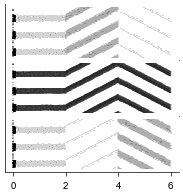

In [6]:
%matplotlib inline
n_intrnrn=params['N_intrnrn']
n_stell=params['N_stell']
colors_stell = ['C{}'.format(i) for i in range(n_intrnrn)]
colors_stell_1 =["k" for i in range(n_intrnrn)]
colors_stell_2 =["k" for i in range(n_intrnrn)]
colors_stell_3 =["k" for i in range(n_intrnrn)]
plt.style.use("analysis/config/paper.mplstyle")
fig,axs = plt.subplots(3,1,figsize=(2.24,2.019))
axs[0].eventplot(stell_spikes_l[:n_stell//2],colors=colors_stell_3,linestyles='solid',linewidths=0.25)
axs[0].tick_params(axis='both', which='major', labelsize=25)
axs[0].set(ylabel='',yticks=[],xticks=[])
axs[1].eventplot(intrnrn_spikes_l,colors=colors_stell_1,linestyles='solid',linewidths=0.25)
axs[1].set(ylabel='',yticks=[],xticks=[])
axs[2].eventplot(stell_spikes_l[n_stell//2:],colors=colors_stell_3,linestyles='solid',linewidths=0.25)
axs[2].set(ylabel='',yticks=[],xticklabels=[0,0,2,4,6])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(top=0.94)
plt.savefig('analysis/figures/Fig1/Fig1_E',dpi=500)
plt.show()

# Grid size and scale

In [5]:
"""
Load Data
"""
raw_data={}

sim_id = "VALD-ACVT-SIZE-S-s-1a"
raw_data[sim_id]={}
params = s_utils.load_sim_params(sim_id)
stell_spks_l, intrnrn_spks_l = s_utils.load_spikes(sim_id)
raw_data[sim_id]["stell_spks"] = stell_spks_l
raw_data[sim_id]["intrnrn_spks"]=intrnrn_spks_l
raw_data[sim_id]["params"] =params

sim_id = "VALD-ACVT-SIZE-S-s-2a"
raw_data[sim_id]={}
params = s_utils.load_sim_params(sim_id)
stell_spks_l, intrnrn_spks_l = s_utils.load_spikes(sim_id)
raw_data[sim_id]["stell_spks"] = stell_spks_l
raw_data[sim_id]["intrnrn_spks"]=intrnrn_spks_l
raw_data[sim_id]["params"] =params


/data/main/2024/GridCellsCond/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/main/2024/GridCellsCond/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


field:  43.69233497806093
scale:  95.98305084745763
field:  21.859935757659905
scale:  47.99999999999999


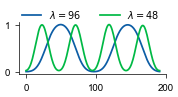

In [6]:

"""
Grid scale and sizes across neurons
"""
%matplotlib inline
sim_id = "VALD-ACVT-SIZE-S-s-1a"

time_window_1a=6
field_1a = a_utils.periodic_activity_all(raw_data[sim_id]["stell_spks"][:raw_data[sim_id]["params"]["N_per_sheet"]],raw_data[sim_id]["params"]["sim_dur"],window_t=200,stdev=9)
print("field: ",a_utils.grid_field_sizes_neurons(raw_data[sim_id]["stell_spks"][:raw_data[sim_id]["params"]["N_per_sheet"]],raw_data[sim_id]["params"]["sim_dur"],win_size_t=200,win_size_n=9))
print("scale: ",a_utils.grid_scale_neurons(raw_data[sim_id]["stell_spks"][:raw_data[sim_id]["params"]["N_per_sheet"]],raw_data[sim_id]["params"]["sim_dur"],win_size=200,stdev=9))
neurons_x = np.arange(0,params["N_per_sheet"])



sim_id = "VALD-ACVT-SIZE-S-s-2a"
time_window_2a=5
field_2a = a_utils.periodic_activity_all(raw_data[sim_id]["stell_spks"][:raw_data[sim_id]["params"]["N_per_sheet"]],raw_data[sim_id]["params"]["sim_dur"],window_t=200,stdev=6)
print("field: ",a_utils.grid_field_sizes_neurons(raw_data[sim_id]["stell_spks"][:raw_data[sim_id]["params"]["N_per_sheet"]],raw_data[sim_id]["params"]["sim_dur"],win_size_t=200,win_size_n=6))
print("scale: ",a_utils.grid_scale_neurons(raw_data[sim_id]["stell_spks"][:raw_data[sim_id]["params"]["N_per_sheet"]],raw_data[sim_id]["params"]["sim_dur"],win_size=200,stdev=6))
neurons_x = np.arange(0,params["N_per_sheet"])

plt.style.use("analysis/config/paper.mplstyle")
fig,axs = plt.subplots(1,1,figsize=(1.895,0.672))
axs.plot(neurons_x,field_1a[time_window_1a,:]/np.max(field_1a[time_window_1a,:]),label="$\\lambda=96$",linewidth=1.25)
axs.plot(neurons_x,field_2a[time_window_2a,:]/np.max(field_2a[time_window_2a,:]),label="$\\lambda=48$",linewidth=1.25)
fig.legend(loc="upper center",borderaxespad=0,ncol=2,fontsize=7,bbox_to_anchor=(0,0,1,1.15))
plt.draw()
axs.set_xticks([0,100, 200])
plt.savefig(f"analysis/figures/Fig1/Fig1_F_bottom.svg")
plt.show()





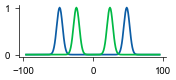

In [7]:
sim_id = "VALD-ACVT-SIZE-S-s-1a"
params_1a = raw_data[sim_id]["params"]
syn_1a = a_utils.build_and_return_matrix(sim_id)[params_1a["N_stell"]+params_1a["N_per_sheet"]//2,:params_1a["N_per_sheet"]]

sim_id = "VALD-ACVT-SIZE-S-s-2a"
params_2a=raw_data[sim_id]["params"]
syn_2a = a_utils.build_and_return_matrix(sim_id)[params_2a["N_stell"]+params_2a["N_per_sheet"]//2,:params_2a["N_per_sheet"]]

x = np.arange(-params_2a["N_per_sheet"]//2,params_2a["N_per_sheet"]//2)
plt.style.use("analysis/config/paper.mplstyle")
fig,axs = plt.subplots(1,1,figsize=(1.496+0.399,0.5+0.172))
axs.plot(x,syn_1a/np.max(syn_1a),label="$\\lambda=96$",linewidth=1.25)
axs.plot(x,syn_2a/np.max(syn_2a),label="$\\lambda=48$",linewidth=1.25)
plt.draw()
axs.set_xticks([-100,0,100])
plt.savefig(f"analysis/figures/Fig1/Fig1_F_top.svg")
